**Общая информация**

**Срок сдачи:** 29 марта 2021, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
#from sklearn.datasets import fetch_mldata, fetch_20newsgroups
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KDTree

from sklearn.metrics import pairwise_distances

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric='minkowski'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
    
    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)
        self.tree = None
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(self.X, metric=self.metric)
    
    def _nearest_values(self, X):
        if self.algorithm == 'brute':
            d = pairwise_distances(X, self.X, metric=self.metric)
            nearest_neighbors_indices = np.argpartition(d, self.n_neighbors)[:, :self.n_neighbors]
        else:
            nearest_neighbors_indices = self.tree.query(X, self.n_neighbors, return_distance=False)
        return self.y[nearest_neighbors_indices]
    
    def _vote(self, x):
        counts = np.unique(x, return_counts=True)
        return counts[0][np.argmax(counts[1])]
    
    def predict(self, X):
        return np.apply_along_axis(self._vote, axis=1, arr=self._nearest_values(X))
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

CPU times: user 762 µs, sys: 113 µs, total: 875 µs
Wall time: 555 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [9]:
%time my_clf.fit(X_train, y_train)

CPU times: user 29 µs, sys: 0 ns, total: 29 µs
Wall time: 33.4 µs


In [10]:
%time clf.predict(X_test)

CPU times: user 1.91 ms, sys: 283 µs, total: 2.19 ms
Wall time: 1.89 ms


array([0, 0, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 1])

In [11]:
%time my_clf.predict(X_test)

CPU times: user 5.49 ms, sys: 0 ns, total: 5.49 ms
Wall time: 4.1 ms


array([0, 0, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 1])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

CPU times: user 616 µs, sys: 89 µs, total: 705 µs
Wall time: 499 µs


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [15]:
%time my_clf.fit(X_train, y_train)

CPU times: user 275 µs, sys: 39 µs, total: 314 µs
Wall time: 236 µs


In [16]:
%time clf.predict(X_test)

CPU times: user 6.1 ms, sys: 306 µs, total: 6.4 ms
Wall time: 4.77 ms


array([0, 0, 0, 0, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2, 2])

In [17]:
%time my_clf.predict(X_test)

CPU times: user 3.25 ms, sys: 0 ns, total: 3.25 ms
Wall time: 2.81 ms


array([0, 0, 0, 0, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2, 2])

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(dtype=np.int32, min_df=30, stop_words='english')
X_train = count_vectorizer.fit_transform(data)
X_train.toarray().shape

(11314, 4242)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [22]:
from sklearn.model_selection import cross_validate

def compare_n_neighbors(clf, X_train, y_train, begin=1, end=10, step=1):
    res = ()
    for i in range(begin, end + 1, step):
        clf.n_neighbors = i;
        res += ((i, cross_validate(clf, X_train, y_train, scoring='accuracy', cv=3, n_jobs=6)),)
    return list((k, np.array(data['test_score']).mean()) for k, data in res)

In [23]:
def find_best_n_neighbors(scores, return_score=True):
    best_n = scores[0][0]
    best_val = scores[0][1]
    for i, val in scores:
        if(val > best_val):
            best_n = i;
            best_val = val;
    if return_score:
        return (best_n, best_val)
    return best_n

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [24]:
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')
mean_scores_count_euc = compare_n_neighbors(my_clf, X_train.toarray(), target, begin=1, end=10)
mean_scores_count_euc

[(1, 0.27178684250956514),
 (2, 0.23165981590638082),
 (3, 0.23855339051470834),
 (4, 0.2385534608173725),
 (5, 0.24120476175880015),
 (6, 0.23961416398087054),
 (7, 0.24005646147568668),
 (8, 0.2400565083441295),
 (9, 0.2375818076952171),
 (10, 0.23767038905213167)]

Text(0.5, 1.0, 'CountVectorizer + euclidean')

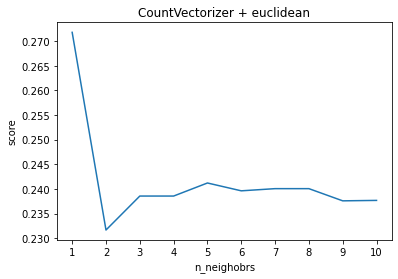

In [25]:
%matplotlib inline
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ticks = [i for i, val in mean_scores_count_euc]
values = [val for i, val in mean_scores_count_euc]
ax.set_xticks(ticks)
ax.plot(ticks, values)
ax.set_xlabel('n_neighobrs')
ax.set_ylabel('score')
ax.set_title('CountVectorizer + euclidean')

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

### Count векторизация и косинусная метрика

In [26]:
my_clf = MyKNeighborsClassifier(n_neighbors=2, metric='cosine')
mean_scores_count_cos = compare_n_neighbors(my_clf, X_train.toarray(), target, begin=1, end=10)
mean_scores_count_cos

[(1, 0.47162893803888745),
 (2, 0.44104692759078673),
 (3, 0.46119869417019377),
 (4, 0.477638456644675),
 (5, 0.4899238706509717),
 (6, 0.4999997656577859),
 (7, 0.5036238914324392),
 (8, 0.5080430231682899),
 (9, 0.5124623892463546),
 (10, 0.5160865853236721)]

Text(0.5, 1.0, 'CountVectorizer + cosine')

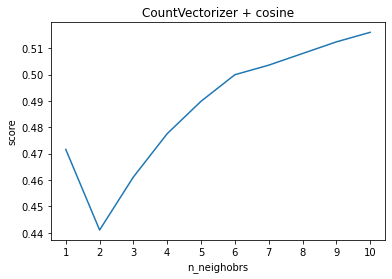

In [27]:
%matplotlib inline
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ticks = [i for i, val in mean_scores_count_cos]
values = [val for i, val in mean_scores_count_cos]
ax.set_xticks(ticks)
ax.plot(ticks, values)
ax.set_xlabel('n_neighobrs')
ax.set_ylabel('score')
ax.set_title('CountVectorizer + cosine')

### Tf-idf векторизация и евклидова метрика

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=7, stop_words='english')
tfidf_X_train = vectorizer.fit_transform(data)
tfidf_X_train.toarray().shape

(11314, 13792)

In [29]:
my_clf = MyKNeighborsClassifier(n_neighbors=2)
mean_scores_tfidf_euc = compare_n_neighbors(my_clf, tfidf_X_train.toarray(), target, begin=1, end=10)
mean_scores_tfidf_euc

[(1, 0.15821096685941782),
 (2, 0.09545768393590685),
 (3, 0.11021707213025227),
 (4, 0.10535576007069263),
 (5, 0.09952195125700695),
 (6, 0.09580964250720297),
 (7, 0.09359986573128502),
 (8, 0.09192089750443351),
 (9, 0.0891809449034271),
 (10, 0.08714826053867401)]

Text(0.5, 1.0, 'TfidfVectorizer + euclidean')

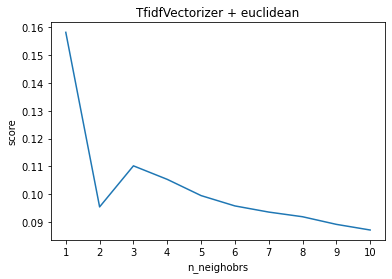

In [30]:
%matplotlib inline
fig3 = plt.figure()
ax = fig3.add_subplot(111)
ticks = [i for i, val in mean_scores_tfidf_euc]
values = [val for i, val in mean_scores_tfidf_euc]
ax.set_xticks(ticks)
ax.plot(ticks, values)
ax.set_xlabel('n_neighobrs')
ax.set_ylabel('score')
ax.set_title('TfidfVectorizer + euclidean')

### Tf-idf векторизация и косинусная метрика

In [31]:
my_clf = MyKNeighborsClassifier(n_neighbors=2, metric='cosine')
mean_scores_tfidf_cos = compare_n_neighbors(my_clf, tfidf_X_train.toarray(), target, begin=1, end=10)
mean_scores_tfidf_cos

[(1, 0.6030585970831518),
 (2, 0.5612512430682745),
 (3, 0.5941312367016652),
 (4, 0.6116324288005082),
 (5, 0.6239177490699191),
 (6, 0.6340823191705336),
 (7, 0.63859005569752),
 (8, 0.6429210278924414),
 (9, 0.6484009330944542),
 (10, 0.6529969932019198)]

Text(0.5, 1.0, 'TfidfVectorizer + cosine')

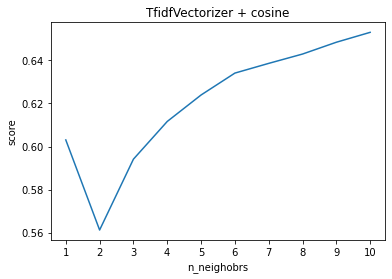

In [32]:
%matplotlib inline
fig4 = plt.figure()
ax = fig4.add_subplot(111)
ticks = [i for i, val in mean_scores_tfidf_cos]
values = [val for i, val in mean_scores_tfidf_cos]
ax.set_xticks(ticks)
ax.plot(ticks, values)
ax.set_xlabel('n_neighobrs')
ax.set_ylabel('score')
ax.set_title('TfidfVectorizer + cosine')

### Определим лучшую модель

Исходя из полученных результатов, лучшую точность на валидации показывает модель, в которой применяется Tf-idf векторизация и используется косинусная метрика. На последнем графике отчетливо видно, что при увеличении числа соседей, точность растет. Посмотрим, как изменится точность, при дальнейшем увеличении количества соседей. После этого выберем наилучшее значение этого параметра.

In [33]:
my_clf = MyKNeighborsClassifier(n_neighbors=2, metric='cosine')
mean_scores_tfidf_cos_1 = compare_n_neighbors(my_clf, tfidf_X_train.toarray(), target, begin=10, end=200, step=10)
mean_scores_tfidf_cos_1

[(10, 0.6529969932019198),
 (20, 0.6637798986685519),
 (30, 0.6683757009995821),
 (40, 0.6690831567096066),
 (50, 0.669701538944067),
 (60, 0.6681992647466165),
 (70, 0.6674037901009912),
 (80, 0.6645754904852842),
 (90, 0.662895959837119),
 (100, 0.6579463241970803),
 (110, 0.6552944374001175),
 (120, 0.6540572276809898),
 (130, 0.6535270284216799),
 (140, 0.6524664189950675),
 (150, 0.6503450595365142),
 (160, 0.6499913433986126),
 (170, 0.6490191512893649),
 (180, 0.6454833959636335),
 (190, 0.6461018719349796),
 (200, 0.6446880150548938)]

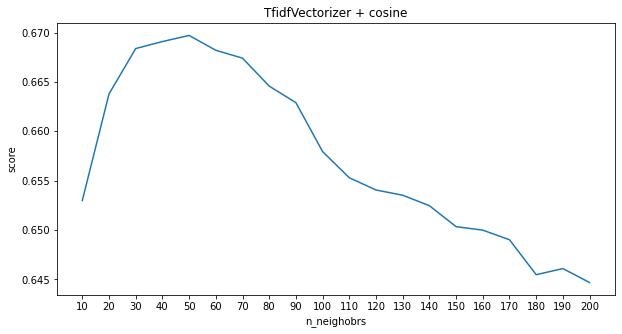

In [34]:
%matplotlib inline
fig5 = plt.figure()
ax = fig5.add_subplot(111)
ticks = [i for i, val in mean_scores_tfidf_cos_1]
values = [val for i, val in mean_scores_tfidf_cos_1]
ax.set_xticks(ticks)
ax.plot(ticks, values)
ax.set_xlabel('n_neighobrs')
ax.set_ylabel('score')
ax.set_title('TfidfVectorizer + cosine')
fig5.set_figheight(5)
fig5.set_figwidth(10)

#### Наилучшее число соседей

In [35]:
n = find_best_n_neighbors(mean_scores_tfidf_cos_1, return_score=False)
n

50

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [36]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [37]:
data_test = newsgroups['data']
target_test = newsgroups['target']

In [38]:
X_test = vectorizer.transform(data_test)
X_test.toarray().shape

(7532, 13792)

In [39]:
my_clf = MyKNeighborsClassifier(n_neighbors=n, metric='cosine')
my_clf.fit(tfidf_X_train.toarray(), target)
y_pred = my_clf.predict(X_test.toarray())
accuracy_score(target_test, y_pred)

0.6325013276686139

Невооруженным глазом видно, что точноть отличается от точности на кросс-валидации. Я предполагаю, что это может быть связано с тем, что в тестовой части выборки могут быть новые слова, которых не было в тренировочной части. Из-за того, что мы векторизируем слова по словарю тренировочной выборки, часть слов не оказывает влияния на классификацию.